<font color='blue'> **Polynomial and  least squares** </font>  

phi= 55.040840821231015


,XX,MED,MOD
0,-3.250000,-5.461245,-3.743190
1,-2.785714,-4.120969,-5.893427


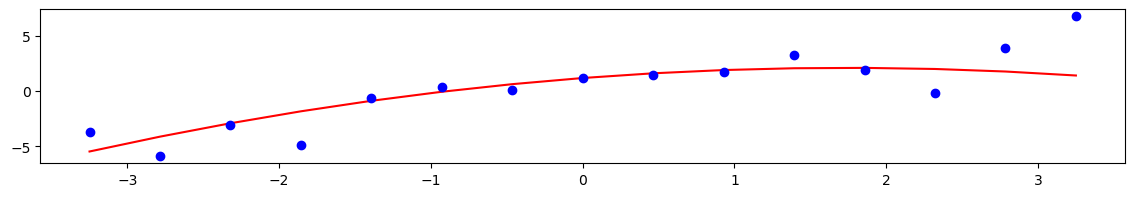

In [1]:
import numpy  as np   ; from pathlib import Path   ; import matplotlib.pyplot as plt  ; import pandas as pd  
from scipy.linalg import lstsq                     ; from scipy.optimize import least_squares   

def data_cooker():
    xx = np.linspace(-3,3,15)  ;     XX = np.linspace(xx[0]-0.25,xx[-1]+0.25,15)
    polypars=np.random.normal(loc=1,scale=3,size=2+1)  ; MED=np.poly1d(polypars)  ; yy=MED(np.linspace(-3,3,15))
    MOD = yy + np.random.normal(loc=0,scale=np.abs(xx*(np.abs(yy[-1]-yy[0]))*0.25), size=len(yy))            ; return XX,xx,MOD, MED, polypars

XX, xx, MOD, MED, polypars = data_cooker()   
c1=pd.DataFrame(XX) ; c2=pd.DataFrame(MED(XX)) ; c3=pd.DataFrame(MOD)  ; d1= pd.concat([c1[:], c2[:], c3[:]], axis=1) ; d1.columns=['XX','MED','MOD'] 
plt.figure(figsize=(14, 2))   ;plt.plot(XX,MED(XX),'r-' ,XX,MOD,'bo' )  
y = d1['MED'] ; m = d1['MOD'] ; sse = np.dot((y-m).T,(y-m))  ; print('phi=',sse) ; d1.head(2)           # don't worry , just a database ... idlle ...

,id2,level_0,id,Observation,Group,Measured,Modelled
0,1,3,4,dr0,drain,-1.607719,-16.07719
1,2,4,5,dr1,drain,-5.000000,-10.43885


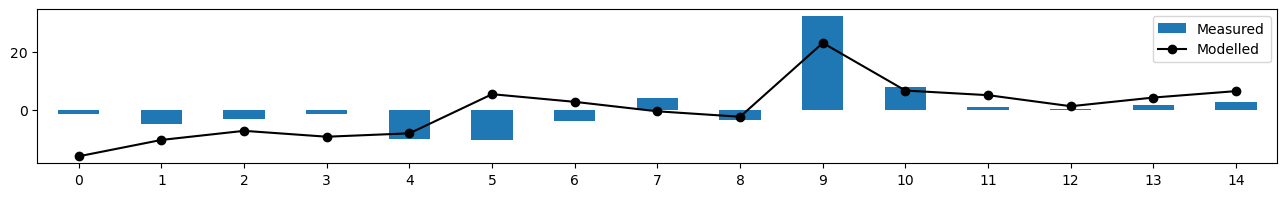

In [2]:
ref_data=Path("E:/15_REPOS/01_Beta-Me/data/SQL")   ;b1=pd.read_csv(ref_data/'y5_ObjF.csv');b1.head(22);b2=b1.drop('Unnamed: 0',axis=1);b2.head(2);

b3=b2['Group'].value_counts() ; b4=pd.DataFrame(b3)   ; b5=b4.drop('head')                   ; L1=b5.index.to_list()  # wherever b4|b5      | real data |
L2=b2[b2['Group'].isin(L1)]   ; L3 = L2.reset_index() ; L4 = L3.drop(L3.columns[1], axis=1)  ; L5=L4.iloc[:,:-9]  ; L5.insert(0,'id2',range(1,len(L5)+1)) 
ax=L5.plot(y=['Measured'],kind='bar',use_index=False,figsize=(16, 2)) ; L5.plot(y=['Modelled'],linestyle='-',marker='o',color='black',ax=ax) ; L5.head(2)

#### `Objective function:`<font color='blue'> **$SSE=\Phi=\sum_{i=1}^{NPAR}\left(y_{i}-m\left(x_{i}\right)\right)^{2}$** </font> `_____i.e_____`<font color='red'> **$\Phi=\left(\mathbf{y}-\mathbf{m}\right)^{T}\left(\mathbf{y}-\mathbf{m}\right)$** </font>

In [3]:
y = L5['Measured'] ; m = L5['Modelled'] ; sse = np.dot((y-m).T,(y-m))       ;SS=np.sum(np.square(m-y)); print('sse(phi):', sse,'    SS(phi):', SS)

sse(phi): 768.8620551837164     SS(phi): 768.8620551837162


In [4]:
MED = d1[['XX', 'MED'      ]].to_numpy()  ; MOD = d1[['XX', 'MOD']      ].to_numpy()           #  y5_ObjF  | database 01  *
#MED = L5[['id2', 'Measured']].to_numpy()  ; MOD = L5[['id2', 'Modelled']].to_numpy()          #  y6_ObjF  | database 02

sol, residuals, rank, s = lstsq(MED, MOD)
print("sol:", sol) ; print("Residuals:", residuals) ; print("rank:", rank) ; print("s:", s)    #  lstsq =  # MIN | 𝐀 @ 𝐱 − 𝐛 |

sol: [[1.         1.22364657]
 [0.         0.22015947]]
Residuals: [6.07435469e-31 3.46169950e+01]
rank: 2
s: [11.72788715  2.78495036]


In [5]:
def sum_2_errors_phi(y,m):
    y = np.atleast_1d(y) ; m = np.atleast_1d(m)  ; phi = np.dot((y-m).T,(y-m))  ; return phi    # iddle .. _ = least_squares(fun_rosenbrock, x0_rosenbrock)

popt: [-6.83997697e+04  9.96581322e-06  6.83993284e+04]   MAX: 8.160346825838623e+27
SS(phi): 1500.6727498782222
Covariance Matrix pcov:


array([[ 3.19684304e+16,  4.65825582e+06, -3.19684303e+16],
       [ 4.65825582e+06,  6.78774256e-04, -4.65825582e+06],
       [-3.19684303e+16, -4.65825582e+06,  3.19684303e+16]])

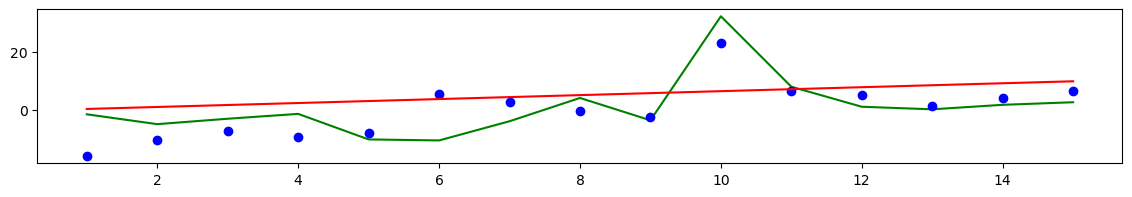

In [6]:
from scipy.optimize import curve_fit     ; XX=L5['id2'];  MED=L5['Measured']   ; MOD = L5['Modelled']
def func(x, a, b, c):                      return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, MED, MOD, )  # bounds=(0, [18., 10., 0.1])                         
plt.figure(figsize=(14, 2))   ;plt.plot(XX,MED,'green' ,XX,MOD,'bo' , XX,func(XX,*popt),'red')  ; print('popt:',popt,' ','MAX:',np.linalg.cond(pcov))  
SS=np.sum(np.square(L5['Measured'] - func(XX, *popt))); print('SS(phi):', SS)                   ; print('Covariance Matrix pcov:'); pcov

In [7]:
OPT=pd.DataFrame(popt[0]*np.exp(-popt[1] * XX)+popt[2])  ;L6= pd.concat([L5[:],OPT[:]],axis=1)  ; L6.rename(columns={ L6.columns[7]: "Optimal" }).tail(4)

,Optimal,level_0,id,Observation,Group,Measured,Modelled,Optimal
11,12,14,15,ch1,const_head,1.000000,4.990921,7.738151
12,13,15,16,ch2,const_head,0.118361,1.183609,8.419725
13,14,16,17,ch3,const_head,1.669406,4.173516,9.101293
14,15,17,18,ch4,const_head,2.557503,6.393757,9.782853
